Step 1: Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

Step 2: Load Image

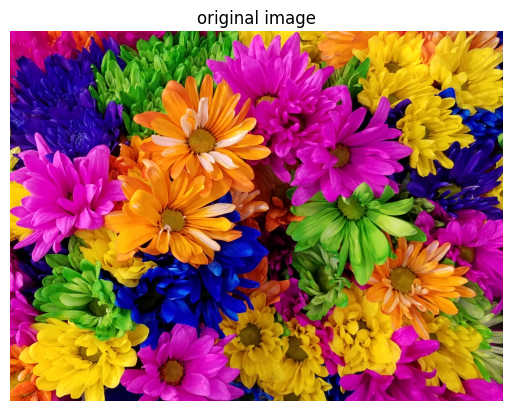

In [ ]:
image=imread('/content/colorful-chrysanthemums.jpg')
plt.imshow(image)
plt.title('original image')
plt.axis("off")
plt.show()

Step 3: Convert Image into Dataset

In [ ]:
og_shape=image.shape
x=image.reshape(-1,3)
if x.max()>1:
  x=x/255
print("shape of dataset:",x.shape)

shape of dataset: (12192768, 3)


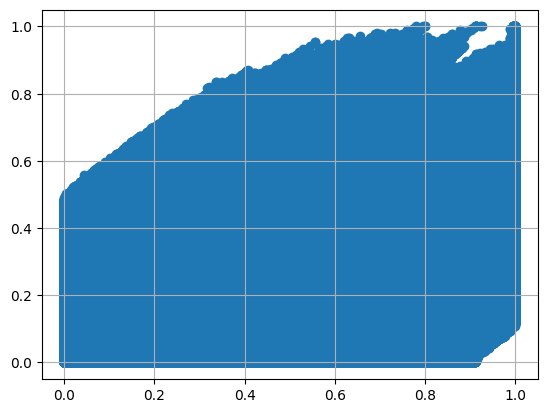

In [ ]:
fig=plt.figure()
plt.scatter(x[:,0],x[:,1])
plt.grid(True)
plt.show()

Step 4: Initialize Random Centers

In [ ]:
k=8
clusters={}
for i in range(k):
  rand=np.random.randint(0,x.shape[0])
  center=x[rand]
  cluster={
      'center':center,
      'points':[]

  }
  clusters[i]=cluster
print(clusters)


{0: {'center': array([0.49411765, 0.34901961, 0.        ]), 'points': []}, 1: {'center': array([0.69803922, 0.00784314, 0.49411765]), 'points': []}, 2: {'center': array([0.75294118, 0.59607843, 0.08235294]), 'points': []}, 3: {'center': array([0.22352941, 0.        , 0.03529412]), 'points': []}, 4: {'center': array([0.65882353, 0.36862745, 0.        ]), 'points': []}, 5: {'center': array([0.99607843, 0.85098039, 0.29019608]), 'points': []}, 6: {'center': array([0.17647059, 0.46666667, 0.01568627]), 'points': []}, 7: {'center': array([0.96470588, 0.82745098, 0.12156863]), 'points': []}}


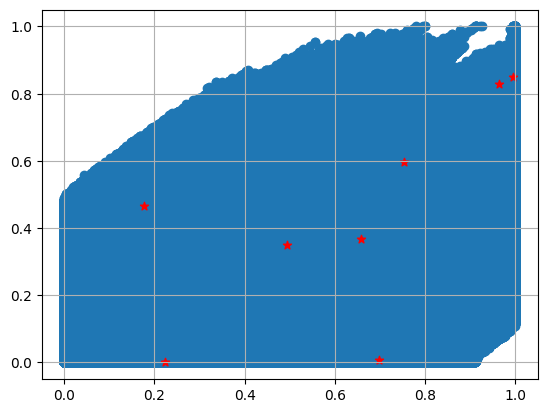

In [ ]:
plt.scatter(x[:,0],x[:,1])
plt.grid(True)
for i in clusters:
  center=clusters[i]['center']
  plt.scatter(center[0],center[1],marker='*',c='red')
plt.show()

Step 5: Define Euclidean Distance

In [ ]:
def distance(p1,p2):
  return np.sqrt(np.sum((p1-p2)**2))


Step 6: Assign functions

In [ ]:
def assign(x,clusters):
  for i in range(x.shape[0]):
    dist=[]
    curr_pixel=x[i]
    for i in range(k):
      dis=distance(curr_pixel,clusters[i]['center'])
      dist.append(dis)
    curr_cluster=np.argmin(dist)
    clusters[curr_cluster]['points'].append(curr_pixel)
  return clusters

Step 7 : Update Functions

In [ ]:
def update(x,clusters):
  for i in range(k):
    points=np.array(clusters[i]['points'])
    if points.shape[0]>0:
      new_center=points.mean(axis=0)
      clusters[i]['center']=new_center
      clusters[i]['points']=[]
  return clusters

Step 8 : Run K-Means

In [ ]:

clusters=assign(x,clusters)
clusters=update(x,clusters)


Step 9: Predict Final Cluster for Each Pixel

In [ ]:
def pred_cluster(X, clusters):
    pred = []
    for i in range(x.shape[0]):
      dist=[]
      for j in range(k):
        dist.append(distance(x[i],clusters[j]['center']))
      pred.append(np.argmin(dist))
    return pred
pred=pred_cluster(x,clusters)

Step 9: Reconstruct Compressed Image

In [18]:
compressed = []
for label in pred:
    compressed.append(clusters[label]['center'])
compressed = np.array(compressed)
compressed_image = compressed.reshape(og_shape)

Step 10: Original vs Compressed

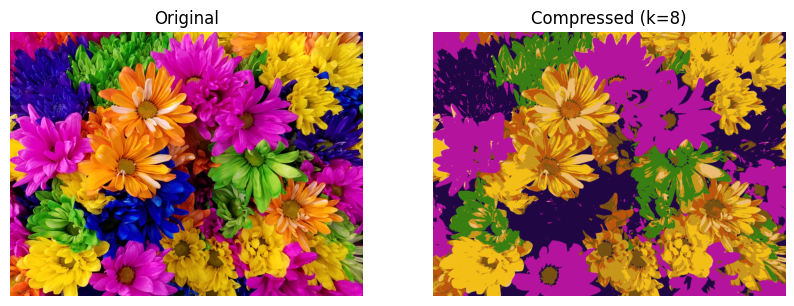

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Original")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(compressed_image)
plt.title(f"Compressed (k={k})")
plt.axis("off")
plt.show()